Observe the settling phase in 3-neuron and 4-neuron coupled networks and its dependence on the connectivity parameters of the network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import math

In [ ]:
from google.colab import files

data_upload = files.upload()

for file_name in data_upload.keys():
  print(f"{file_name} has been uploaded, with length {len(data_upload[file_name])}")

Saving functions_sim.py to functions_sim.py
Saving neuron_layer.py to neuron_layer.py
Saving neuron_network.py to neuron_network.py
functions_sim.py has been uploaded, with length 10698
neuron_layer.py has been uploaded, with length 13019
neuron_network.py has been uploaded, with length 4425


In [ ]:
from neuron_layer import NeuronLayerX
from neuron_network import NeuronNetwork
from functions_sim import *

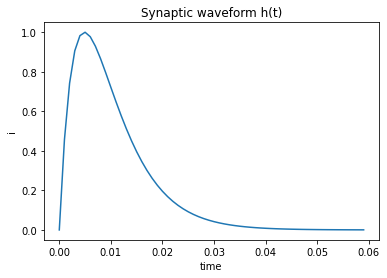

In [ ]:
h_syn = get_synaptic_waveform(6e-3,  4e-3)

The neuron, layer classes are well equipped to deal with multiple neurons- 

only the function run_simulation, which simulates the dynamics for certain number of timesteps, needs to be suitably modified to accommodate multiple neurons

In [ ]:
num_neurons=3
nl = NeuronLayerX('nl',num_neurons, h_syn)

In [ ]:
NN = NeuronNetwork()


In [ ]:
NN.add_layer(nl)

In [ ]:
NN.layers[0].title

'nl'

In [ ]:
NN.create_connections([(nl, nl)])

In [ ]:
weight_mat = np.zeros((3,3))
weight_mat

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
w_self = -1
w_cross = -2

weight_mat = w_cross*np.ones((num_neurons,num_neurons))+ (w_self-w_cross)*np.eye(num_neurons)
weight_mat

array([[-1., -2., -2.],
       [-2., -1., -2.],
       [-2., -2., -1.]])

In [ ]:
nl.Fanout_weights[0] = np.copy(weight_mat)
nl.Fanout_weights[0]

array([[-1., -2., -2.],
       [-2., -1., -2.],
       [-2., -2., -1.]])

In [ ]:
i_ext_mag = 1.5
N = 500

In [ ]:
iext = i_ext_mag*np.ones((num_neurons, N))
iext.shape

(3, 500)

In [ ]:
nl.input_currents.shape

(3, 1)

In [ ]:
nl.voltages.shape

(3, 1)

In [ ]:
def run_simulation_multi_neuron(weight_matrix, i_ext_mag, synaptic_waveform, num_steps, num_neurons, v_initial):
    nl = NeuronLayerX('nl',num_neurons,synaptic_waveform)
    NN = NeuronNetwork()
    NN.add_layer(nl)
    NN.create_connections([(nl, nl)])
    nl.Fanout_weights[0] = np.copy(weight_matrix) # cause of error: Fanout_weights is a LIST.
    # index refers to the index of output connection, so assign array to the first element in the list
    N = num_steps
    iext = i_ext_mag*np.ones((N, num_neurons))
    # iext[1,0:iext_delay_n2] = 0   # delay the synaptic current to neuron N2

    NN.reset_v_i_x()
    # set initial conditions
    nl.voltages = np.copy(v_initial) # removed for now
    v = np.zeros((N,num_neurons))
    s = np.zeros((N,num_neurons))
    c = np.zeros((N,num_neurons))
    i_in = np.zeros((N,num_neurons))

    for ti in range(N):
        v[ti, :] = nl.voltages.reshape((-1,))
        s[ti, :] = nl.activations.reshape((-1,))
        c[ti, :] = nl.i_presyn_current.reshape((-1,))
        i_in[ti, :] = nl.input_currents.reshape((-1,))
        # print(Z.i_presyn_current)
        NN.compute_v()
        NN.compute_i()
        # print(iext[:,tz].shape)
        nl.input_currents = nl.input_currents + iext[ti,:].reshape(nl.input_currents.shape)
        # print(nl.input_currents)
        # the crucial step: adding external currents after compute_i (since compute_i resets current initially)


    output = {'voltage': v, 'spike': s, 'presynaptic_current': c, 'input_current': i_in, 'external_current': iext,
              'neuron_layer': nl, 'neuron_network': NN}
    return output


In [ ]:
weight_mat

array([[-1., -2., -2.],
       [-2., -1., -2.],
       [-2., -2., -1.]])

In [ ]:
v_init = np.array([0.1, 0.3, 0.5]).reshape((num_neurons, 1))
v_init

array([[0.1],
       [0.3],
       [0.5]])

In [ ]:
out = run_simulation_multi_neuron(weight_mat, i_ext_mag, h_syn, N, num_neurons,v_init)

In [ ]:
v, s = out['voltage'], out['spike']

In [ ]:
v.shape

(500, 3)

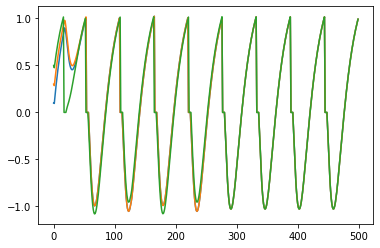

In [ ]:
for i in range(num_neurons):
  plt.plot(v[:,i])
plt.show()

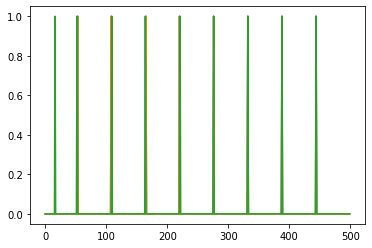

In [ ]:
for i in range(num_neurons):
  plt.plot(s[:,i])
plt.show()

In [ ]:
N = 500
w_self = -1.5
w_cross = 1

weight_mat = w_cross*np.ones((num_neurons,num_neurons))+ (w_self-w_cross)*np.eye(num_neurons)

weight_mat

array([[-1.5,  1. ,  1. ],
       [ 1. , -1.5,  1. ],
       [ 1. ,  1. , -1.5]])

In [ ]:
out = run_simulation_multi_neuron(weight_mat, i_ext_mag, h_syn, N, num_neurons,v_init)

In [ ]:
v, s = out['voltage'], out['spike']

In [ ]:
v.shape

(500, 3)

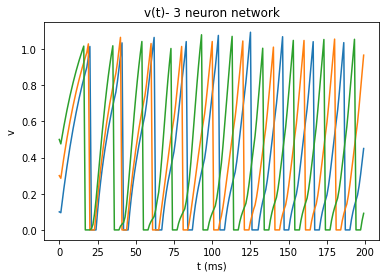

In [ ]:
for i in range(num_neurons):
  plt.plot(v[:200,i])
plt.xlabel("t (ms)")
plt.ylabel("v")
plt.title("v(t)- 3 neuron network")
plt.show()

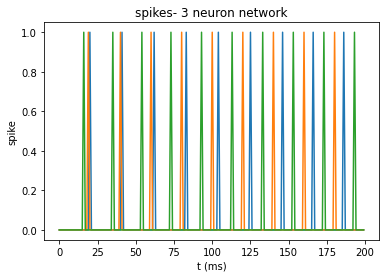

In [ ]:
for i in range(num_neurons):
  plt.plot(s[:200,i])
plt.xlabel("t (ms)")
plt.ylabel("spike")
plt.title("spikes- 3 neuron network")
plt.show()

Yay! It looks as if they do settle in complementary phases

In [ ]:
phi12, phi1, phi2 = get_phase_t(s[:,0], s[:,1])


In [ ]:
phi23, _, phi3 = get_phase_t(s[:,1], s[:,2])

In [ ]:
phi13 = (phi1-phi3)%360

Text(0.5, 1.0, 'phi(t): 3 neurons, w_cross=1, w_self=-1.5')

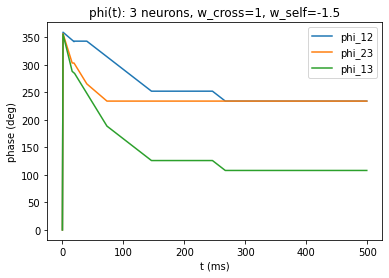

In [ ]:
plt.plot(phi12)
plt.plot(phi23)
plt.plot(phi13)
plt.legend(["phi_12", "phi_23", "phi_13"])
plt.xlabel("t (ms)")
plt.ylabel("phase (deg)")
plt.title("phi(t): 3 neurons, w_cross="+str(w_cross)+", w_self="+str(w_self))

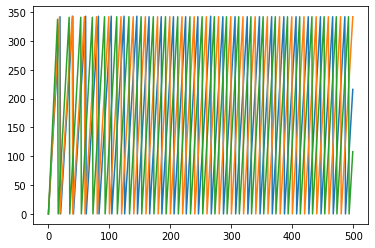

In [ ]:
plt.plot(phi1)
plt.plot(phi2)
plt.plot(phi3)

In [ ]:
num_neurons4 = 4
w_cross = 1
w_self = -1.5
weight_mat4 = w_cross*np.ones((num_neurons4,num_neurons4))+ (w_self-w_cross)*np.eye(num_neurons4)
v_init4 = np.array([0.1, 0.3, 0.5, 0.7]).reshape((num_neurons4, 1))
out4 = run_simulation_multi_neuron(weight_mat4, i_ext_mag, h_syn, N, num_neurons4,v_init4)
v4, s4 = out4['voltage'], out4['spike']


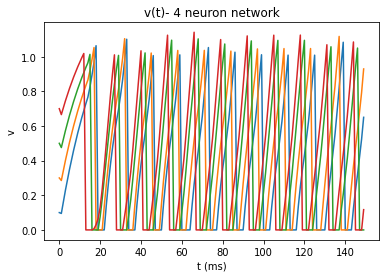

In [ ]:
for i in range(num_neurons4):
  plt.plot(v4[:150,i])
plt.xlabel("t (ms)")
plt.ylabel("v")
plt.title("v(t)- 4 neuron network")
plt.show()

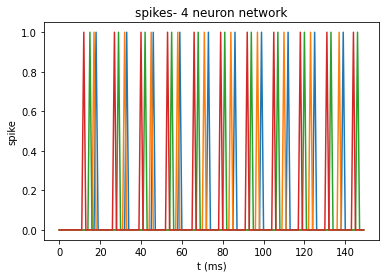

In [ ]:
for i in range(num_neurons4):
  plt.plot(s4[:150,i])
plt.xlabel("t (ms)")
plt.ylabel("spike")
plt.title("spikes- 4 neuron network")
plt.show()

In [ ]:
phi14, phi1, phi4 = get_phase_t(s4[:,0], s4[:,3])
phi24, phi2, _ = get_phase_t(s4[:,1], s4[:,3])
phi34, phi3, _ = get_phase_t(s4[:,2], s4[:,3])


Text(0.5, 1.0, 'phi(t): 4 neurons, w_cross=1, w_self=-1.5')

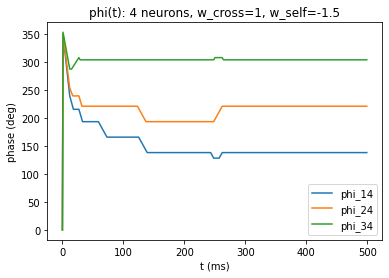

In [ ]:
plt.plot(phi14)
plt.plot(phi24)
plt.plot(phi34)
plt.legend(["phi_14", "phi_24", "phi_34"])
plt.xlabel("t (ms)")
plt.ylabel("phase (deg)")
plt.title("phi(t): 4 neurons, w_cross="+str(w_cross)+", w_self="+str(w_self))

In [ ]:
phi1_ss = phi1[-1]
phi1_ss

221.53846153846155

In [ ]:
phi2_ss = phi2[-1]
phi2_ss

304.61538461538464

In [ ]:
phi3_ss = phi3[-1]
phi3_ss

27.692307692307693

In [ ]:
phi4_ss = phi4[-1]
phi4_ss

83.07692307692308

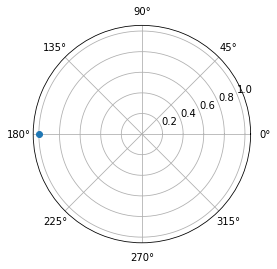

In [ ]:
plt.polar(3.14, 1,'o')

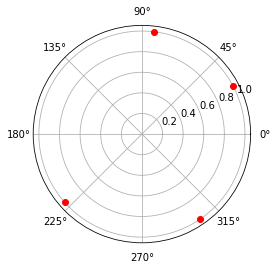

In [ ]:
plt.polar([phi1_ss*3.14/180,phi2_ss*3.14/180, phi3_ss*3.14/180, phi4_ss*3.14/180],[1,1,1,1],'ro')

In [ ]:
def get_phase_plot(num_neurons, weight_matrix,v_initial, i_ext_mag, h_syn, N):
  out = run_simulation_multi_neuron(weight_matrix, i_ext_mag, h_syn, N, num_neurons,v_initial)
  v, s = out['voltage'], out['spike'] 
  phase_all = np.zeros((num_neurons,))
  for i in range(num_neurons):
    _, phase_i,_ = get_phase_t(s[:,i],s[:,0])
    phase_all[i] = phase_i[-1] #settling phase
    plt.polar(phase_all[i]*math.pi/180, 1,'o')
  return phase_all


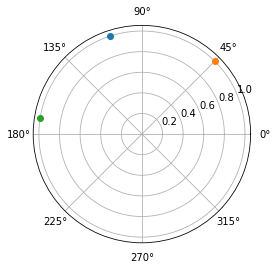

In [ ]:
N = 500
num_neurons = 3
i_ext_mag = 1.5
w_cross = 1
w_self = -1.5
weight_matrix = w_cross*np.ones((num_neurons, num_neurons)) + (w_self-w_cross)*np.eye(num_neurons)
v_initial = np.random.uniform(0, 1, size=(num_neurons, 1))
phase_all = get_phase_plot(num_neurons, weight_matrix, v_initial, i_ext_mag, h_syn, N)

In [ ]:
phase_all

array([216.,  90., 342.])

In [ ]:
def run_simulation_multi_neuron_noisy(weight_matrix, i_ext_mag, synaptic_waveform, num_steps, num_neurons, v_initial, noise_sd):
    nl = NeuronLayerX('nl',num_neurons,synaptic_waveform)
    NN = NeuronNetwork()
    NN.add_layer(nl)
    NN.create_connections([(nl, nl)])
    nl.Fanout_weights[0] = np.copy(weight_matrix) # cause of error: Fanout_weights is a LIST.
    # index refers to the index of output connection, so assign array to the first element in the list
    N = num_steps
    iext = i_ext_mag*np.ones((N, num_neurons)) + np.random.normal(0, scale=noise_sd, size=(N, num_neurons))
    # iext[1,0:iext_delay_n2] = 0   # delay the synaptic current to neuron N2

    NN.reset_v_i_x()
    # set initial conditions
    nl.voltages = np.copy(v_initial) # removed for now
    v = np.zeros((N,num_neurons))
    s = np.zeros((N,num_neurons))
    c = np.zeros((N,num_neurons))
    i_in = np.zeros((N,num_neurons))

    for ti in range(N):
        v[ti, :] = nl.voltages.reshape((-1,))
        s[ti, :] = nl.activations.reshape((-1,))
        c[ti, :] = nl.i_presyn_current.reshape((-1,))
        i_in[ti, :] = nl.input_currents.reshape((-1,))
        # print(Z.i_presyn_current)
        NN.compute_v()
        NN.compute_i()
        # print(iext[:,tz].shape)
        nl.input_currents = nl.input_currents + iext[ti,:].reshape(nl.input_currents.shape)
        # print(nl.input_currents)
        # the crucial step: adding external currents after compute_i (since compute_i resets current initially)


    output = {'voltage': v, 'spike': s, 'presynaptic_current': c, 'input_current': i_in, 'external_current': iext,
              'neuron_layer': nl, 'neuron_network': NN}
    return output


In [ ]:
num_neurons4 = 4
w_cross = 1
w_self = -1.5
noise_sd = 0.2
weight_mat4 = w_cross*np.ones((num_neurons4,num_neurons4))+ (w_self-w_cross)*np.eye(num_neurons4)
v_init4 = np.array([0.1, 0.3, 0.5, 0.7]).reshape((num_neurons4, 1))
out4 = run_simulation_multi_neuron_noisy(weight_mat4, i_ext_mag, h_syn, N, num_neurons4,v_init4, noise_sd)
v4, s4 = out4['voltage'], out4['spike']


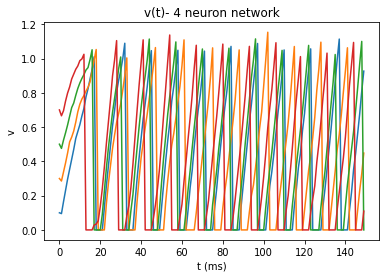

In [ ]:
for i in range(num_neurons4):
  plt.plot(v4[:150,i])
plt.xlabel("t (ms)")
plt.ylabel("v")
plt.title("v(t)- 4 neuron network")
plt.show()

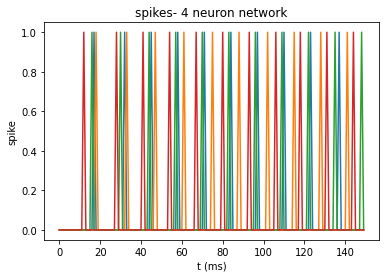

In [ ]:
for i in range(num_neurons4):
  plt.plot(s4[:150,i])
plt.xlabel("t (ms)")
plt.ylabel("spike")
plt.title("spikes- 4 neuron network")
plt.show()

In [ ]:
def get_phase_plot_noisy(num_neurons, weight_matrix,v_initial, i_ext_mag, h_syn, N, noise_sd):
  out = run_simulation_multi_neuron_noisy(weight_matrix, i_ext_mag, h_syn, N, num_neurons,v_initial, noise_sd)
  v, s = out['voltage'], out['spike'] 
  phase_all = np.zeros((num_neurons,))
  for i in range(num_neurons):
    _, phase_i,_ = get_phase_t(s[:,i],s[:,0])
    phase_all[i] = phase_i[-1] #settling phase
    plt.polar(phase_all[i]*math.pi/180, 1,'o')
  plt.title(str(num_neurons)+" neurons")
  return phase_all


High self inhibition and cross excitation:

Expectation: strong repulsion in phase

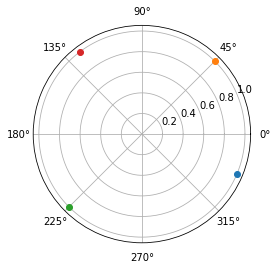

In [ ]:
num_neurons4 = 4
w_cross = 1
w_self = -2
noise_sd = 0.2
weight_mat4 = w_cross*np.ones((num_neurons4,num_neurons4))+ (w_self-w_cross)*np.eye(num_neurons4)
v_init4 = np.array([0.1, 0.3, 0.5, 0.7]).reshape((num_neurons4, 1))
phi = get_phase_plot_noisy(num_neurons4, weight_mat4, v_init4, i_ext_mag, h_syn, N, noise_sd)

In [ ]:
phi

array([337.5       ,  45.        , 225.        , 127.05882353])

High cross inhibition, low self inhibition

Expectation: synchronization

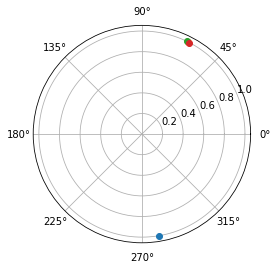

In [ ]:
num_neurons4 = 4
w_cross = -2
w_self = -0.5
noise_sd = 0.2
weight_mat4 = w_cross*np.ones((num_neurons4,num_neurons4))+ (w_self-w_cross)*np.eye(num_neurons4)
v_init4 = np.array([0.1, 0.3, 0.5, 0.7]).reshape((num_neurons4, 1))
phi = get_phase_plot_noisy(num_neurons4, weight_mat4, v_init4, i_ext_mag, h_syn, N, noise_sd)

In [ ]:
phi

array([279.31034483,  63.52941176,  64.        ,  62.60869565])

High self inhibition, and cross inhibition

Expectation: Repulsion

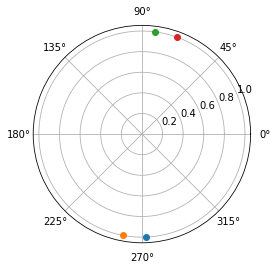

In [ ]:
num_neurons4 = 4
w_cross = -1
w_self = -2
noise_sd = 0.2
weight_mat4 = w_cross*np.ones((num_neurons4,num_neurons4))+ (w_self-w_cross)*np.eye(num_neurons4)
v_init4 = np.array([0.1, 0.3, 0.5, 0.7]).reshape((num_neurons4, 1))
phi = get_phase_plot_noisy(num_neurons4, weight_mat4, v_init4, i_ext_mag, h_syn, N, noise_sd)

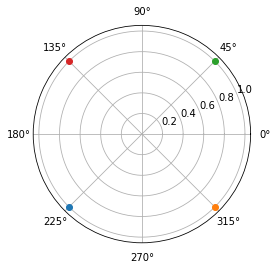

In [ ]:
num_neurons4 = 4
w_cross = 1
w_self = -2
noise_sd = 0.2
weight_mat4 = w_cross*np.ones((num_neurons4,num_neurons4))+ (w_self-w_cross)*np.eye(num_neurons4)
v_init4 = np.array([0.1, 0.3, 0.5, 0.7]).reshape((num_neurons4, 1))
phi = get_phase_plot_noisy(num_neurons4, weight_mat4, v_init4, i_ext_mag, h_syn, N, noise_sd)

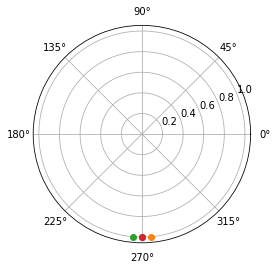

In [ ]:
num_neurons4 = 4
w_cross = -1.5
w_self = -0.5
noise_sd = 0.2
weight_mat4 = w_cross*np.ones((num_neurons4,num_neurons4))+ (w_self-w_cross)*np.eye(num_neurons4)
v_init4 = np.array([0.1, 0.3, 0.5, 0.7]).reshape((num_neurons4, 1))
phi = get_phase_plot_noisy(num_neurons4, weight_mat4, v_init4, i_ext_mag, h_syn, N, noise_sd)

# Use random initial phase to ensure robustness of settling phase

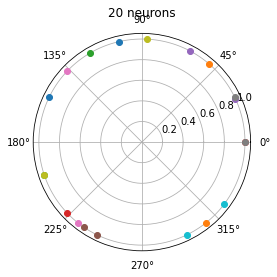

In [ ]:
num_neurons = 20
w_cross = 1.5/(num_neurons-1)
w_self = -2
noise_sd = 0.2
N = 500
i_ext_mag = 1.5
weight_mat = w_cross*np.ones((num_neurons,num_neurons))+ (w_self-w_cross)*np.eye(num_neurons)
v_init = np.random.uniform(0, 1, size=(num_neurons, 1))
# v_init = np.linspace(0, 1, 6).reshape((num_neurons, 1))
phi = get_phase_plot_noisy(num_neurons, weight_mat, v_init, i_ext_mag, h_syn, N, noise_sd)

In [ ]:
phi

array([ 10.90909091,  52.94117647, 317.64705882, 258.75      ,
       168.75      , 141.81818182,  76.36363636,  42.35294118,
       303.75      , 112.5       ])

In [ ]:
num_neurons = 6
w_cross = 1/(num_neurons-1)
w_self = -2
noise_sd = 0.2
N = 500
i_ext_mag = 1.5
weight_mat = w_cross*np.ones((num_neurons,num_neurons))+ (w_self-w_cross)*np.eye(num_neurons)
v_init = np.random.uniform(0, 1, size=(num_neurons, 1))
out = run_simulation_multi_neuron_noisy(weight_mat, i_ext_mag, h_syn, N, num_neurons,v_init, noise_sd)
v, s = out['voltage'], out['spike']

Text(0.5, 1.0, 'v')

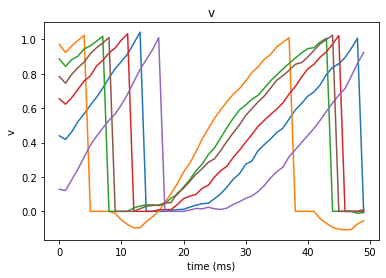

In [ ]:
for i in range(num_neurons):
  plt.plot(v[:50,i])
plt.xlabel("time (ms)")
plt.ylabel("v")
plt.title("v")

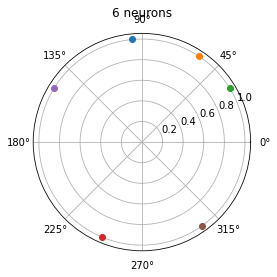

In [ ]:
phi = get_phase_plot_noisy(num_neurons, weight_mat, v_init, i_ext_mag, h_syn, N, noise_sd)

In [ ]:
i = out['external_current']

In [ ]:
i.shape

(500, 6)

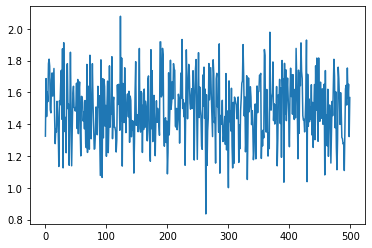

In [ ]:
plt.plot(i[:,0])

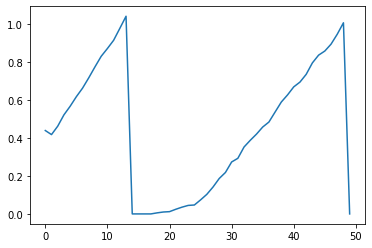

In [ ]:
plt.plot(v[:50,0])

In [ ]:
i_in = out['input_current']

In [ ]:
i_in.shape

(500, 6)

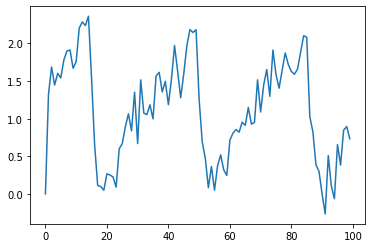

In [ ]:
plt.plot(i_in[:100,0])

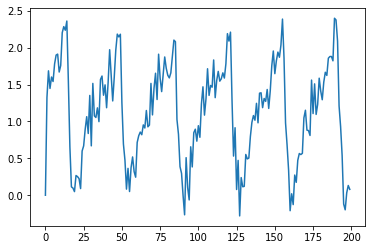

In [ ]:
plt.plot(i_in[:200,0])

Solve vertex coloring

In [ ]:
def get_phase_plot_noisy(num_neurons, weight_matrix,v_initial, i_ext_mag, h_syn, N, noise_sd):
  out = run_simulation_multi_neuron_noisy(weight_matrix, i_ext_mag, h_syn, N, num_neurons,v_initial, noise_sd)
  v, s = out['voltage'], out['spike'] 
  phase_all = np.zeros((num_neurons,))
  for i in range(num_neurons):
    _, phase_i,_ = get_phase_t(s[:,i],s[:,0])
    phase_all[i] = phase_i[-1] #settling phase
    plt.polar(phase_all[i]*math.pi/180, 1,'o')
  plt.legend([str(i) for i in range(num_neurons)])
  plt.title(str(num_neurons)+" neurons")
  return phase_all


In [ ]:
num_neurons = 3
w_cross = 1
w_self = -2
noise_sd = 0.2
i_ext_mag = 1.5
N = 500
weight_mat = w_cross*np.ones((num_neurons,num_neurons))+ (w_self-w_cross)*np.eye(num_neurons)
weight_mat


array([[-2.,  1.,  1.],
       [ 1., -2.,  1.],
       [ 1.,  1., -2.]])

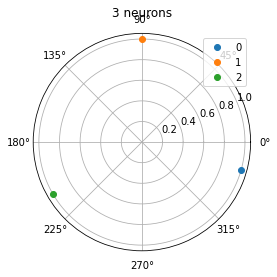

In [ ]:
v_init = np.random.uniform(0, 1, size=(num_neurons, 1))
phi = get_phase_plot_noisy(num_neurons, weight_mat, v_init, i_ext_mag, h_syn, N, noise_sd)

In [ ]:
num_neurons = 3
w_cross = 1
w_self = -2
noise_sd = 0.2
i_ext_mag = 1.5
N = 500
weight_mat = w_cross*np.ones((num_neurons,num_neurons))+ (w_self-w_cross)*np.eye(num_neurons)
weight_mat[0,2]=0
weight_mat[2,0]=0
weight_mat


array([[-2.,  1.,  0.],
       [ 1., -2.,  1.],
       [ 0.,  1., -2.]])

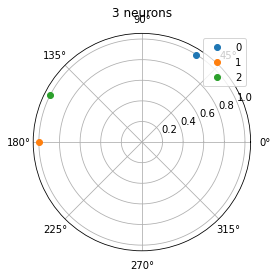

In [ ]:
v_init = np.random.uniform(0, 1, size=(num_neurons, 1))
phi = get_phase_plot_noisy(num_neurons, weight_mat, v_init, i_ext_mag, h_syn, N, noise_sd)

Next

In [ ]:
num_neurons = 4
w_cross = 1/(num_neurons-1)
w_self = -2
noise_sd = 0.3
i_ext_mag = 1.5
N = 500
weight_mat = w_cross*np.ones((num_neurons,num_neurons))+ (w_self-w_cross)*np.eye(num_neurons)
weight_mat[1,2]=0
weight_mat[2,1]=0
weight_mat[3,2]=0
weight_mat[2,3]=0
weight_mat[1,3]=0
weight_mat[3,1]=0

weight_mat


array([[-2.        ,  0.33333333,  0.33333333,  0.33333333],
       [ 0.33333333, -2.        ,  0.        ,  0.        ],
       [ 0.33333333,  0.        , -2.        ,  0.        ],
       [ 0.33333333,  0.        ,  0.        , -2.        ]])

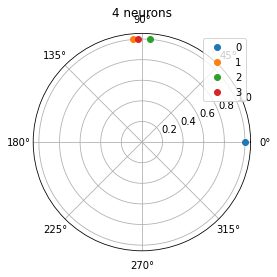

In [ ]:
v_init = np.random.uniform(0, 1, size=(num_neurons, 1))
phi = get_phase_plot_noisy(num_neurons, weight_mat, v_init, i_ext_mag, h_syn, N, noise_sd)

Next

In [ ]:
num_neurons = 5
w_cross = 1/(num_neurons-1)
w_self = -2
noise_sd = 0.2
i_ext_mag = 1.5
N = 500
weight_mat =(w_self)*np.eye(num_neurons)
weight_mat[0,3] = w_cross
weight_mat[0,4] = w_cross
weight_mat[1,3] = w_cross
weight_mat[1,4] = w_cross
weight_mat[2,3] = w_cross
weight_mat[2,4] = w_cross
weight_mat[3,0] = w_cross
weight_mat[4,0] = w_cross
weight_mat[3,1] = w_cross
weight_mat[4,1] = w_cross
weight_mat[3,2] = w_cross
weight_mat[4,2] = w_cross
weight_mat


array([[-2.  , -0.  , -0.  ,  0.25,  0.25],
       [-0.  , -2.  , -0.  ,  0.25,  0.25],
       [-0.  , -0.  , -2.  ,  0.25,  0.25],
       [ 0.25,  0.25,  0.25, -2.  , -0.  ],
       [ 0.25,  0.25,  0.25, -0.  , -2.  ]])

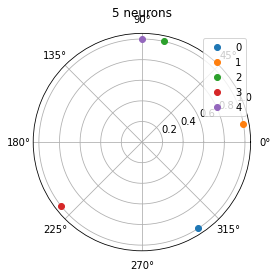

In [ ]:
v_init = np.random.uniform(0, 1, size=(num_neurons, 1))
phi = get_phase_plot_noisy(num_neurons, weight_mat, v_init, i_ext_mag, h_syn, N, noise_sd)